In [1]:
import numpy as np
import pandas as pd

pd.options.display.float_format = '{:.3f}'.format

from statsmodels.graphics.gofplots import qqplot
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.expand_frame_repr = False

In [2]:
from scipy.stats import kstest
from scipy.stats import shapiro
from scipy.stats import chisquare
from scipy.stats import jarque_bera
from scipy.stats import cramervonmises
from scipy.stats import normaltest, norm
from scipy.stats import anderson
from scipy.stats import zscore

from scipy.stats import ks_2samp
from scipy.stats import anderson_ksamp

In [3]:
from itertools import combinations

from scipy.stats import mannwhitneyu # or from scipy.stats import ttest_ind, ttest_rel
from scipy.stats import levene
from scipy.stats import f_oneway
from scipy.stats import bartlett

In [4]:
def point_metrics(data_):
    conf = 0.95
    std = np.std(data_, ddof=1)
    mean = np.mean(data_)
    median = np.median(data_)
    print(f'Выборочное среднее == {mean}\n'
          f'Медианное значение == {median}\n'
          f'Стандартное отклонение == {std}\n'
          f'Выборочная дисперсия == {np.var(data_, ddof=1)}\n'
          f'I-ая квартиля == {np.percentile(data_, 25)}\n'
          f'II-ая квартиля == {np.percentile(data_, 50)}\n'
          f'III-ая квартиля == {np.percentile(data_, 75)}\n'
          f'Дов. Интервал с выборочным средним: {norm.interval(conf, loc=mean, scale=std)}\n'
          f'Дов. Интервал с медианным значением: {norm.interval(conf, loc=median, scale=std)}\n\n')


In [5]:
def fill_zeros(f_obs, f_exp):
    """ Fill zero bins """
    observed = []
    expected = []

    k = 0
    while k < len(f_exp):
        _f = f_obs[k]
        f_ = f_exp[k]
        while (_f <= 5 or f_ <= 5) and k < len(f_exp) - 1:
            k += 1
            _f += f_obs[k]
            f_ += f_exp[k]

        if (_f <= 5 or f_ <= 5) and k == len(f_exp) - 1:
            observed[-1] += _f
            expected[-1] += f_
        else:
            observed.append(_f)
            expected.append(f_)
        k += 1

    return observed, expected


def check_for_norm(data_):
    """ Check for normal distribution"""
    data_ = zscore(data_)

    observed_frequencies, bins = np.histogram(data_, bins='auto')
    standard_norm = np.random.normal(loc=np.mean(data_), scale=np.std(data_), size=len(data_))
    expected_frequencies, bins = np.histogram(standard_norm, bins=len(observed_frequencies))
    observed_frequencies, expected_frequencies = fill_zeros(observed_frequencies, expected_frequencies)
    print(sum(observed_frequencies), sum(expected_frequencies))
    print(observed_frequencies, expected_frequencies)

    chi = chisquare(f_obs=observed_frequencies, f_exp=expected_frequencies)

    res = cramervonmises(data_, 'norm')
    anderson_stat, anderson_critical, significance_level = anderson(data_, dist='norm')

    v = [
        ['Chi-square', chi.statistic, chi.pvalue],
        ['D’Agostino and Pearson', *normaltest(data_, nan_policy='propagate')],
        ['Jarque-Bera', *jarque_bera(data_)],
        ['Shapiro-Wilk', *shapiro(data_)],
        ['Anderson', anderson_stat, anderson_critical[2]],
        [None, None, None],
        ['Cramér-von Mises', res.statistic, res.pvalue],  # not good for 'norm' 
        ['Kolmogorov-Smirnov', *kstest(data_, cdf=norm.cdf)],  # not good 'norm'
    ]

    return_df = pd.DataFrame(v, columns=['Method_Name', 'statistics', 'p_value'])
    print(return_df)

In [6]:
def some_fun(l, ax, title=None):
    h_g = sns.histplot(data=l, bins='auto', discrete=False, kde=True, ax=ax)
    h_g.set_title(title)

####

In [7]:
data = pd.DataFrame(columns=["sepal length",
                             "sepal width",
                             "petal length",
                             "petal width",
                             "class"])

file = open('iris.dat.txt', 'r')

for line in file:
    words = line.split(',')
    data.loc[len(data.index)] = words

data["sepal length"] = data["sepal length"].astype(float)
data["sepal width"] = data["sepal width"].astype(float)
data["petal length"] = data["petal length"].astype(float)
data["petal width"] = data["petal width"].astype(float)
data["class"] = data["class"].astype(str)
data.head(10)

,sepal length,sepal width,petal length,petal width,class
0,5.100,3.500,1.400,0.200,Iris-setosa\n
1,4.900,3.000,1.400,0.200,Iris-setosa\n
2,4.700,3.200,1.300,0.200,Iris-setosa\n
3,4.600,3.100,1.500,0.200,Iris-setosa\n
4,5.000,3.600,1.400,0.200,Iris-setosa\n
5,5.400,3.900,1.700,0.400,Iris-setosa\n
6,4.600,3.400,1.400,0.300,Iris-setosa\n
7,5.000,3.400,1.500,0.200,Iris-setosa\n
8,4.400,2.900,1.400,0.200,Iris-setosa\n
9,4.900,3.100,1.500,0.100,Iris-setosa\n


### Исследуем ирисы нормальность

Исследуем All classes(sepal length): 
150 150
[52, 28, 28, 14, 17, 11] [9, 25, 41, 31, 29, 15]
              Method_Name  statistics  p_value
0              Chi-square     225.281    0.000
1  D’Agostino and Pearson       5.736    0.057
2             Jarque-Bera       4.486    0.106
3            Shapiro-Wilk       0.976    0.010
4                Anderson       0.889    0.767
5                    None         NaN      NaN
6        Cramér-von Mises       0.130    0.456
7      Kolmogorov-Smirnov       0.089    0.171
Выборочное среднее == 5.843333333333334
Медианное значение == 5.8
Стандартное отклонение == 0.828066127977863
Выборочная дисперсия == 0.6856935123042507
I-ая квартиля == 5.1
II-ая квартиля == 5.8
III-ая квартиля == 6.4
Дов. Интервал с выборочным средним: (4.2203535456791865, 7.466313120987481)
Дов. Интервал с медианным значением: (4.1770202123458535, 7.422979787654146)


Исследуем Iris-setosa
 (sepal length): 
50 50
[11, 9, 16, 14] [13, 6, 11, 20]
              Method_Name  sta

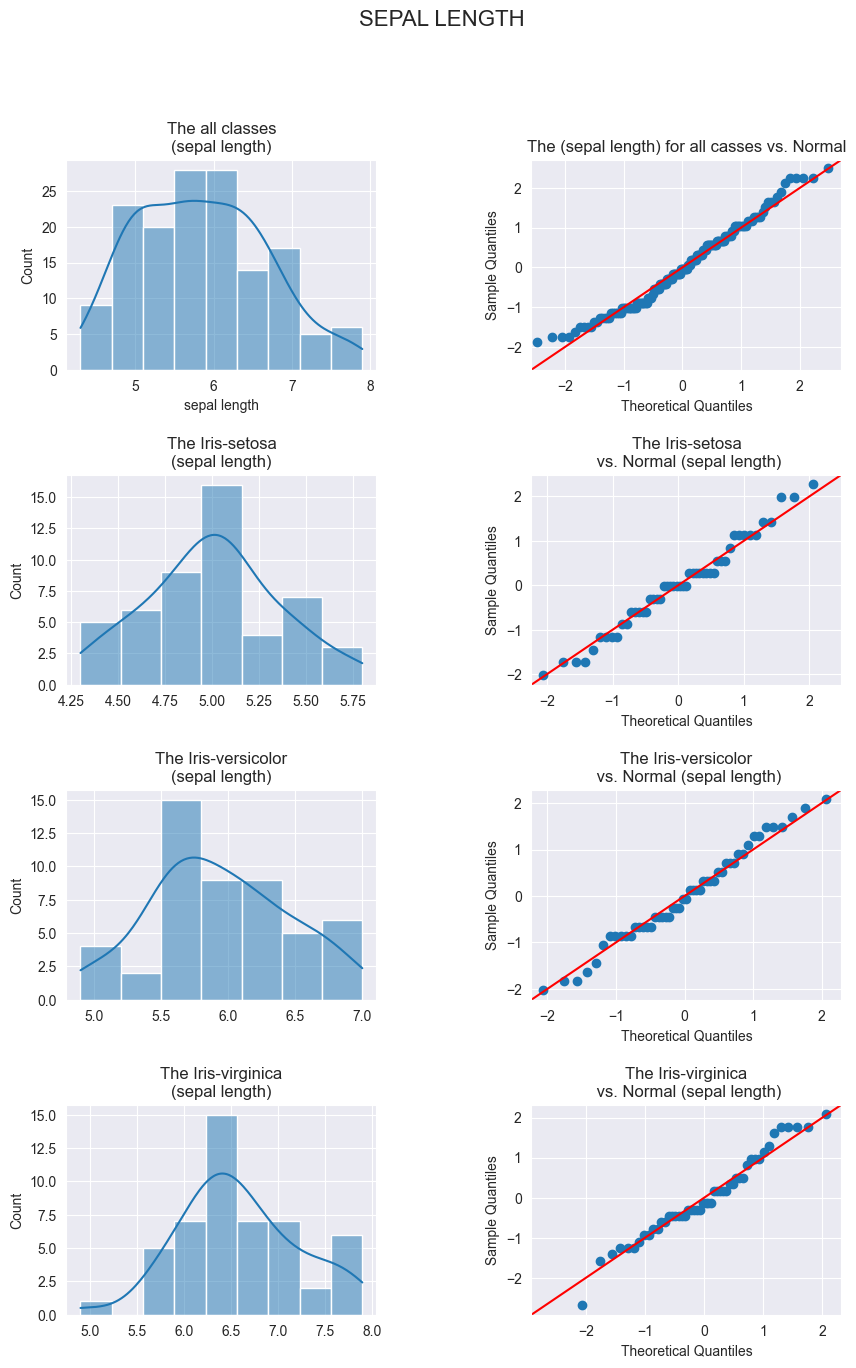

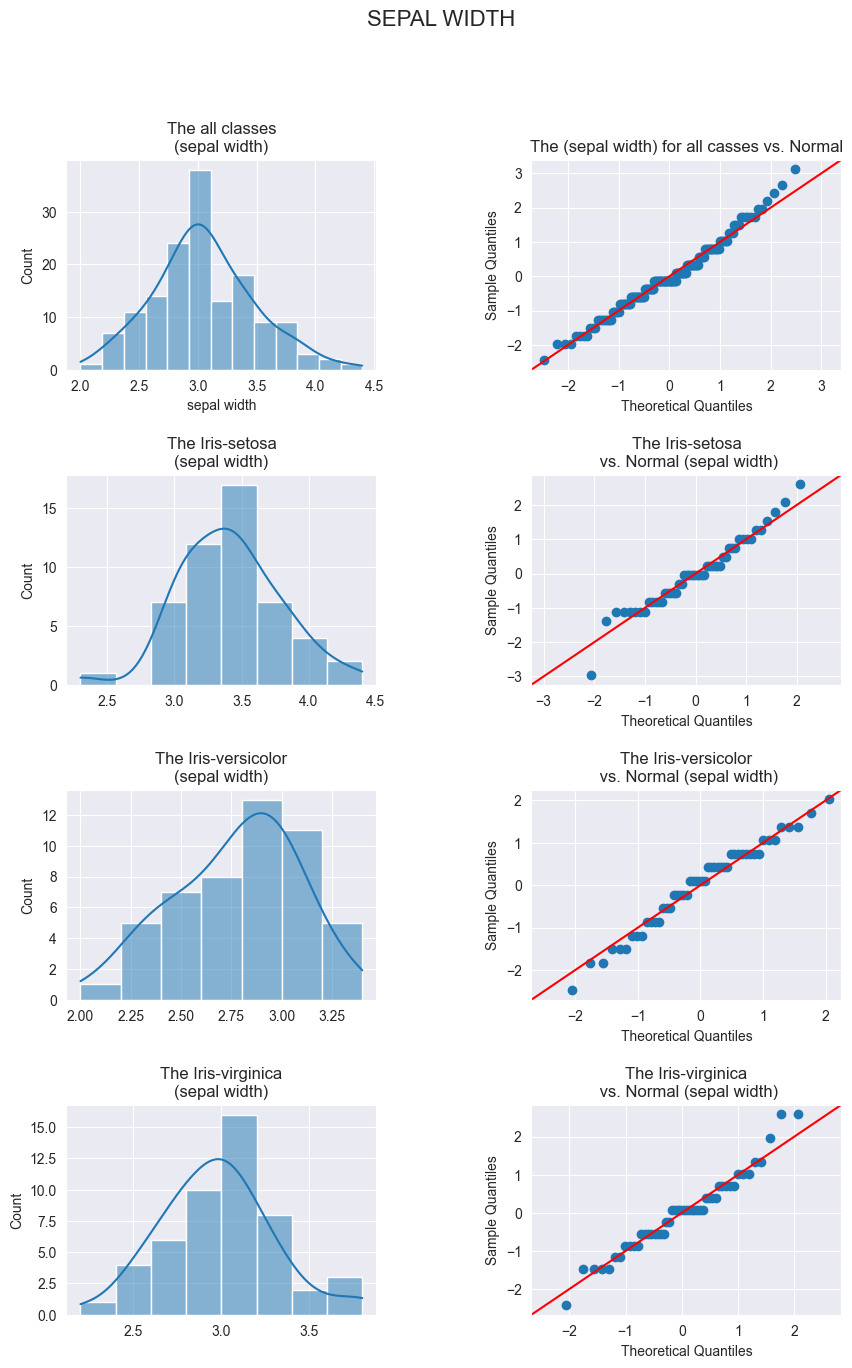

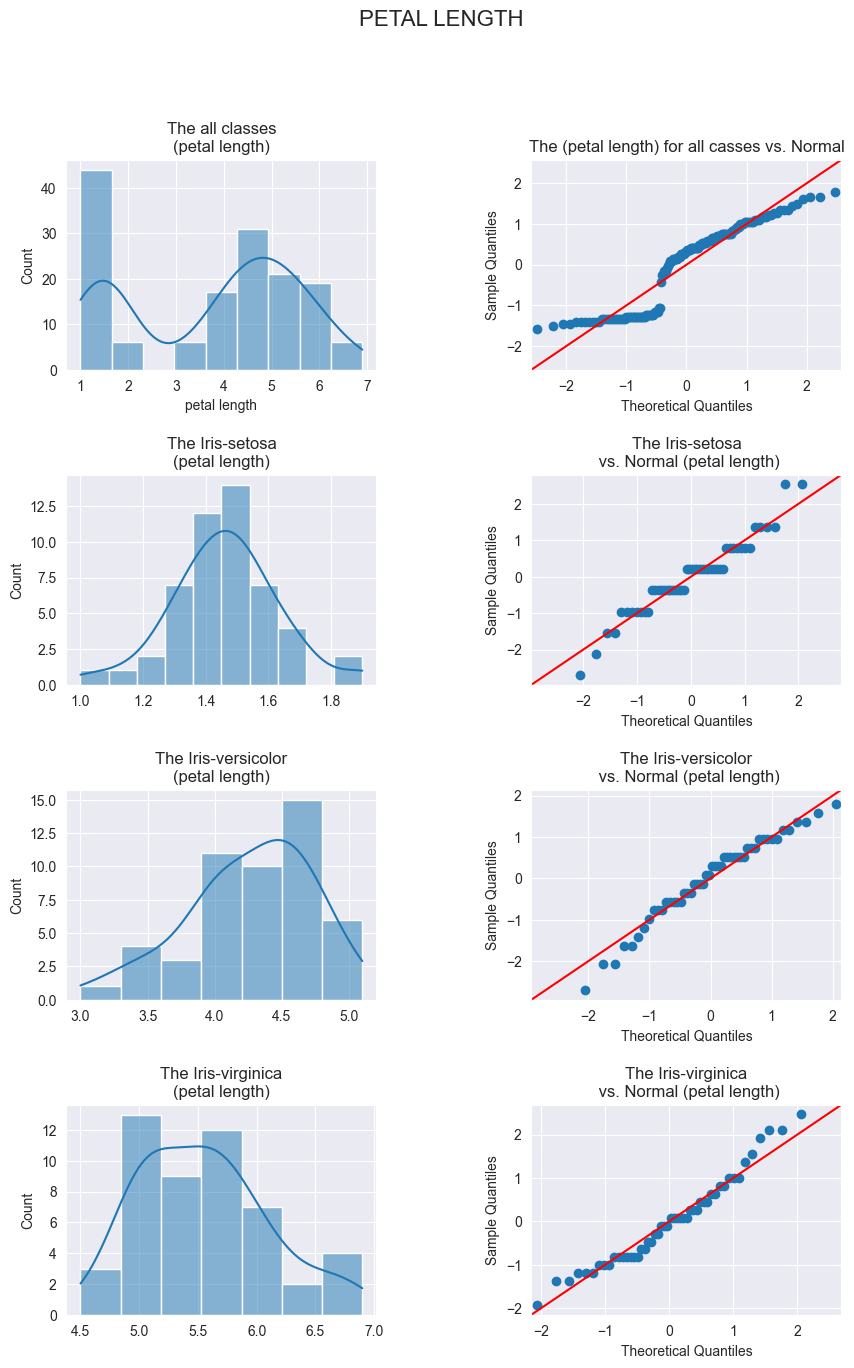

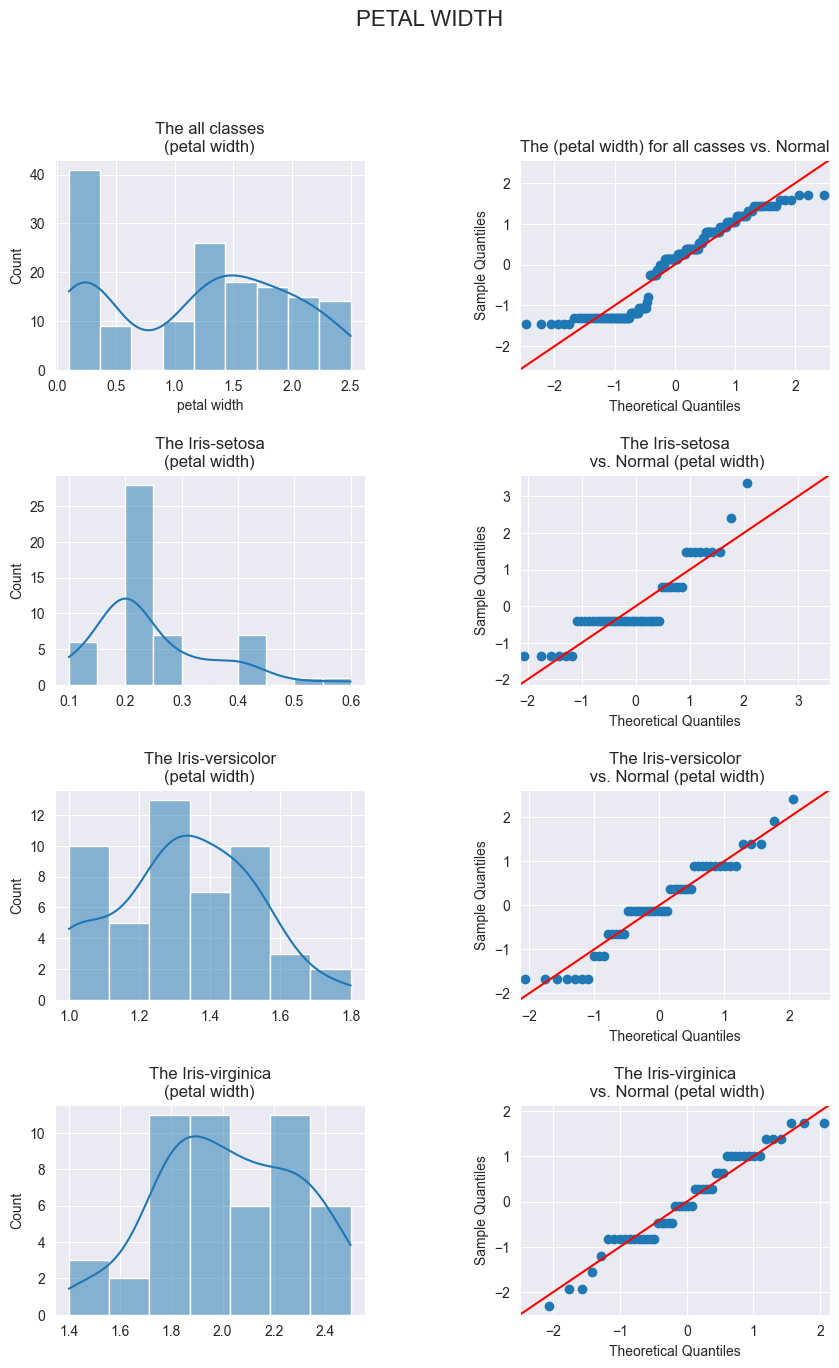

In [8]:
grouped_data = data.groupby("class")
columns = data.columns[:-1]

my_dict = {
    'Iris-setosa\n': {},
    'Iris-versicolor\n': {},
    'Iris-virginica\n': {}
}

for col in columns:
    fig, axs = plt.subplots(ncols=2, nrows=4, figsize=(10, 15))
    fig.subplots_adjust(wspace=0.5, hspace=0.5)
    fig.suptitle(f"{col.upper()}", fontsize=16, ha='center')
    
    # All
    the_all = data[col]
    some_fun(l=the_all, title=f'The all classes\n({col})', ax=axs[0][0])
    qqplot(zscore(the_all), line='45', ax=axs[0][1])
    axs[0, 1].set_title(f'The ({col}) for all casses vs. Normal')
    
    print(f"Исследуем All classes({col}): ")
    check_for_norm(the_all)
    point_metrics(the_all)
    
    # Batches
    i = 1
    for group, group_data in grouped_data:
        the_data = group_data[col].values
        my_dict[group][col] = the_data
        some_fun(l=the_data, title=f'The {group}({col})', ax=axs[i][0])
        qqplot(zscore(the_data), line='45', ax=axs[i][1])
        axs[i, 1].set_title(f'The {group} vs. Normal ({col})')
        
        print(f"Исследуем {group} ({col}): ")
        check_for_norm(the_data)
        point_metrics(the_data)
        i += 1
        

### Проверяем гипотезы о равенстве средних и дисперсий 

In [9]:
flowers = list(my_dict.keys())
characteristics = list(my_dict[flowers[0]].keys())
print(characteristics)

for char in characteristics:
    print(f'\n---------------------{char}-----------------------')
    for fl_1, fl_2 in combinations(flowers, 2):
        print('The {0} vs {1}:'.format(fl_1[:-2], fl_2[:-2]))
        print('statistics: {:.3f} p-value: {:.3f} - U-test(mean)'.format(*mannwhitneyu(my_dict[fl_1][char], my_dict[fl_2][char])))
        print('statistics: {:.3f} p-value: {:.3f} - Levene(dispersion)'.format(*levene(my_dict[fl_1][char], my_dict[fl_2][char])))
    print('The All flowers:')
    temp = [my_dict[key][char] for key in my_dict]
    print('statistics: {:.3f} p-value: {:.3f} - ANOVA(mean)'.format(*f_oneway(*temp)))
    print('statistics: {:.3f} p-value: {:.3f} - Bartlett(dispersion)'.format(*bartlett(*temp)))

['sepal length', 'sepal width', 'petal length', 'petal width']

---------------------sepal length-----------------------
The Iris-setos vs Iris-versicolo:
statistics: 168.500 p-value: 0.000 - U-test(mean)
statistics: 8.173 p-value: 0.005 - Levene(dispersion)
The Iris-setos vs Iris-virginic:
statistics: 38.500 p-value: 0.000 - U-test(mean)
statistics: 11.454 p-value: 0.001 - Levene(dispersion)
The Iris-versicolo vs Iris-virginic:
statistics: 526.000 p-value: 0.000 - U-test(mean)
statistics: 1.025 p-value: 0.314 - Levene(dispersion)
The All flowers:
statistics: 119.265 p-value: 0.000 - ANOVA(mean)
statistics: 16.006 p-value: 0.000 - Bartlett(dispersion)

---------------------sepal width-----------------------
The Iris-setos vs Iris-versicolo:
statistics: 2305.500 p-value: 0.000 - U-test(mean)
statistics: 0.664 p-value: 0.417 - Levene(dispersion)
The Iris-setos vs Iris-virginic:
statistics: 2073.500 p-value: 0.000 - U-test(mean)
statistics: 1.057 p-value: 0.306 - Levene(dispersion)
The Ir

### Проверяем гипотезу о равенстве распределений

In [10]:
for char in characteristics:
    print(f'\n---------------------{char}-----------------------')
    for fl_1, fl_2 in combinations(flowers, 2):
        print('The {0} vs {1}:'.format(fl_1[:-1], fl_2[:-1]))
        print('statistics: {:.3f} p-value: {:.3f} - Kolmogorov-Smirnov'.format(*ks_2samp(my_dict[fl_1][char], my_dict[fl_2][char])))


---------------------sepal length-----------------------
The Iris-setosa vs Iris-versicolor:
statistics: 0.780 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-setosa vs Iris-virginica:
statistics: 0.920 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-versicolor vs Iris-virginica:
statistics: 0.460 p-value: 0.000 - Kolmogorov-Smirnov

---------------------sepal width-----------------------
The Iris-setosa vs Iris-versicolor:
statistics: 0.680 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-setosa vs Iris-virginica:
statistics: 0.500 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-versicolor vs Iris-virginica:
statistics: 0.260 p-value: 0.068 - Kolmogorov-Smirnov

---------------------petal length-----------------------
The Iris-setosa vs Iris-versicolor:
statistics: 1.000 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-setosa vs Iris-virginica:
statistics: 1.000 p-value: 0.000 - Kolmogorov-Smirnov
The Iris-versicolor vs Iris-virginica:
statistics: 0.860 p-value: 0.000 - Kolmogorov-Smirnov

----------